# Proyecto Análisis de Ventas

## Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
# Otras librerias y configuraciones
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Mostrar todas las columnas
pd.set_option("display.max_columns", None)
# Ajuste del ancho del contenido en celdas
pd.set_option("display.max_colwidth", None)
# Evitar que pandas divida columnas en varias líneas
pd.set_option("display.expand_frame_repr", False)
# Desactiva la notación científica para todos los valores de punto flotante
# pd.set_option('display.float_format', '{:.10f}'.format)

## Entendimiento de los datos

In [3]:
# Información general acerca de los datos
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]
for i,tienda in enumerate(lista_tiendas):
  print(f"Tienda {i+1}")
  print(tienda.info())
  print(tienda.describe())
  print("-"*50)

Tienda 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
             Precio  Costo de envío  Calificación  Cantidad de cuotas    

In [4]:
# Crear un único dataframe con las 4 tienda por facilidad
for i,tienda in enumerate(lista_tiendas):
  tienda["Nombre tienda"] = f"Tienda {i+1}"
df_tiendas = pd.concat(lista_tiendas, ignore_index=True)
df_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Nombre tienda
3398,Dinosaurio Rex,Juguetes,21100.0,0.0,07/12/2021,Izabela de León,Bogotá,5,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 2
1340,Set de ollas,Artículos para el hogar,107300.0,9100.0,10/03/2020,Camila Rivera,Santa Marta,3,Tarjeta de crédito,4,11.24079,-74.19904,Tienda 1
6277,Bloques de construcción,Juguetes,39700.0,0.0,08/06/2021,Camila Rivera,Cartagena,4,Tarjeta de crédito,8,10.39972,-75.51444,Tienda 3
3860,Cuerda para saltar,Deportes y diversión,23300.0,1900.0,24/01/2020,Camila Rivera,Manizales,5,Tarjeta de crédito,8,5.06889,-75.51738,Tienda 2
8857,Dashboards con Power BI,Libros,35200.0,0.0,15/01/2020,Pedro Gomez,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 4


In [5]:
# Descripción de las variales numéricas de las 4 tiendas
df_tiendas.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


In [6]:
# Productos únicos
producto_unicos = df_tiendas["Producto"].unique().tolist()
producto_unicos.sort()
producto_unicos

['Ajedrez de madera',
 'Armario',
 'Asistente virtual',
 'Auriculares',
 'Auriculares con micrófono',
 'Balón de baloncesto',
 'Balón de voleibol',
 'Batería',
 'Bicicleta',
 'Bloques de construcción',
 'Cama box',
 'Cama king',
 'Carrito de control remoto',
 'Celular ABXY',
 'Ciencia de datos con Python',
 'Cubertería',
 'Cubo mágico 8x8',
 'Cuerda para saltar',
 'Dashboards con Power BI',
 'Dinosaurio Rex',
 'Estufa',
 'Guitarra acústica',
 'Guitarra eléctrica',
 'Impresora',
 'Iniciando en programación',
 'Iphone 15',
 'Juego de mesa',
 'Kit de bancas',
 'Lavadora de ropa',
 'Lavavajillas',
 'Mesa de centro',
 'Mesa de comedor',
 'Mesa de noche',
 'Microondas',
 'Mochila',
 'Modelado predictivo',
 'Muñeca bebé',
 'Olla de presión',
 'Pandereta',
 'Refrigerador',
 'Secadora de ropa',
 'Set de ollas',
 'Set de vasos',
 'Silla de oficina',
 'Sillón',
 'Smart TV',
 'Smartwatch',
 'Sofá reclinable',
 'TV LED UHD 4K',
 'Tablet ABXY',
 'Vaso térmico']

De lo anterior parece que no hay valores mal escritos que generen más de una categoría para el mismo producto.

In [7]:
# Categorías únicas
categoria_prod_unicos = df_tiendas["Categoría del Producto"].unique().tolist()
categoria_prod_unicos.sort()
categoria_prod_unicos

['Artículos para el hogar',
 'Deportes y diversión',
 'Electrodomésticos',
 'Electrónicos',
 'Instrumentos musicales',
 'Juguetes',
 'Libros',
 'Muebles']

Tampoco parece haber duplicidad con los datos de categoría de producto.

In [8]:
# Contar categorías únicas por producto
categorias_por_producto = df_tiendas.groupby("Producto")["Categoría del Producto"].nunique()
# Filtrar productos que aparecen en 2 o más categorías
productos_en_varias_categorias = categorias_por_producto[categorias_por_producto > 1]
print(productos_en_varias_categorias)

Series([], Name: Categoría del Producto, dtype: int64)


Este resultado indica que no hay productos en más de una categoría (como se podría esperar)

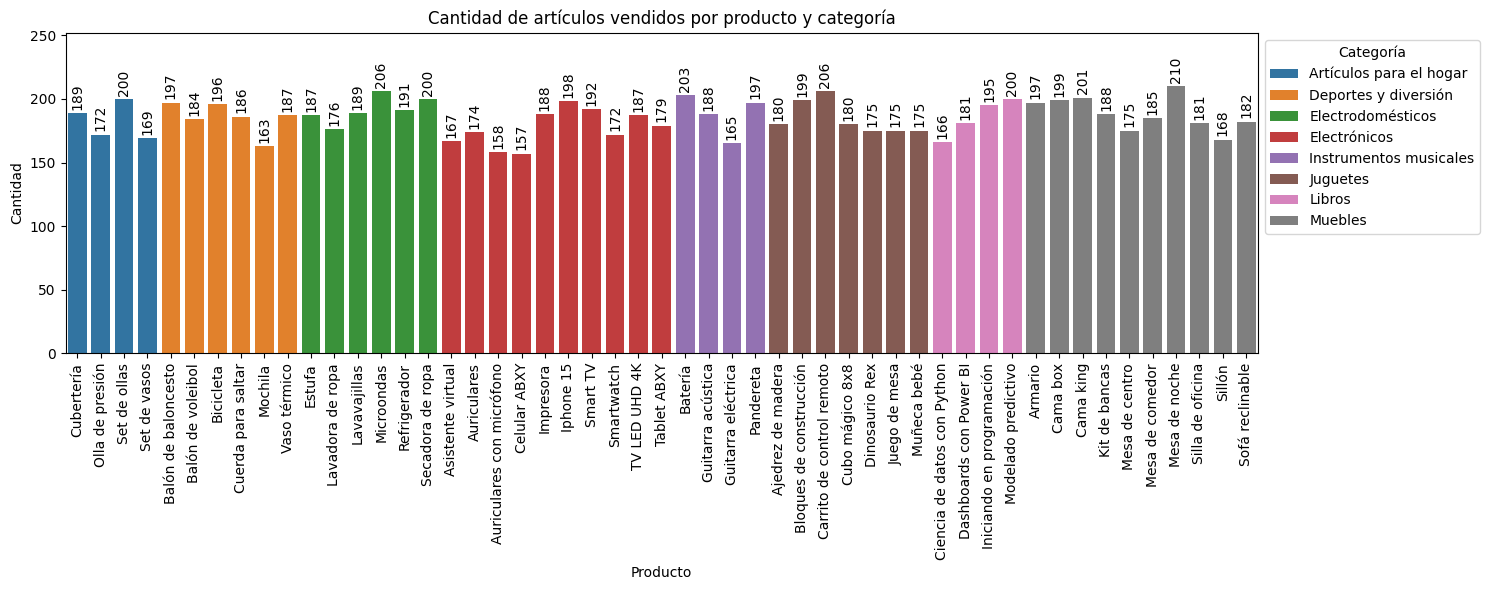

In [9]:
# Agregación de datos para graficas
df_categoria_agrupado = df_tiendas.groupby(["Categoría del Producto", "Producto"]).size().reset_index(name="Cantidad")
# Grafica por categoría y producto
plt.figure(figsize=(15,6))
sns.barplot(data=df_categoria_agrupado, x="Producto", y="Cantidad", hue="Categoría del Producto")
plt.title("Cantidad de artículos vendidos por producto y categoría")
plt.ylabel("Cantidad")
plt.ylim(0, df_categoria_agrupado["Cantidad"].max() * 1.2)
plt.xlabel("Producto")
for i, row in df_categoria_agrupado.iterrows():
    plt.text(x=i, y=row["Cantidad"] + 5, s=str(row["Cantidad"]), ha="center", rotation="vertical")
plt.legend(title="Categoría")
# Mueve la leyenda fuera del gráfico, para ver la gráfica
plt.legend(title="Categoría", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Ciudades donde se compran productos
ciudad_unicos = df_tiendas["Lugar de Compra"].unique().tolist()
ciudad_unicos.sort()
ciudad_unicos

['Armenia',
 'Barranquilla',
 'Bogotá',
 'Bucaramanga',
 'Cali',
 'Cartagena',
 'Cúcuta',
 'Inírida',
 'Leticia',
 'Manizales',
 'Medellín',
 'Neiva',
 'Pasto',
 'Pereira',
 'Riohacha',
 'Santa Marta',
 'Soacha',
 'Valledupar',
 'Villavicencio']

In [11]:
# Metodos de pago
metodo_pago_unicos = df_tiendas["Método de pago"].unique().tolist()
metodo_pago_unicos.sort()
metodo_pago_unicos

['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']

In [12]:
df_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Nombre tienda
491,Mesa de centro,Muebles,131100.0,7200.0,08/07/2022,Juliana Costa,Medellín,1,Cupón,1,6.25184,-75.56359,Tienda 1
7609,Cama king,Muebles,794300.0,40500.0,19/10/2022,Izabela de León,Medellín,4,Cupón,1,6.25184,-75.56359,Tienda 4
8496,Cubertería,Artículos para el hogar,50900.0,3200.0,03/08/2020,Santiago Silva,Bogotá,5,Tarjeta de crédito,2,4.60971,-74.08175,Tienda 4
5996,Cama king,Muebles,850900.0,45800.0,12/08/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 3
7250,Silla de oficina,Muebles,326100.0,18000.0,06/02/2023,Lucas Olivera,Pereira,5,Tarjeta de crédito,3,4.81333,-75.69611,Tienda 4


## Análisis de facturación



In [13]:
# Ventas por tienda
ventas_por_tienda = df_tiendas.groupby("Nombre tienda")["Precio"].sum().reset_index()
ventas_por_tienda = ventas_por_tienda.rename(columns={"Precio": "Ventas"})
ventas_por_tienda["Ventas Format"] = ventas_por_tienda["Ventas"].apply(lambda x: f"{x:,.1f}")
ventas_por_tienda["Ventas Millones"] = ventas_por_tienda["Ventas"].apply(lambda x: round(x/1_000_000, 1))
ventas_por_tienda

,Nombre tienda,Ventas,Ventas Format,Ventas Millones
0,Tienda 1,1.150880e+09,"1,150,880,400.0",1150.9
1,Tienda 2,1.116344e+09,"1,116,343,500.0",1116.3
2,Tienda 3,1.098020e+09,"1,098,019,600.0",1098.0
3,Tienda 4,1.038376e+09,"1,038,375,700.0",1038.4


In [14]:
# Identificar la tienda con mayor valor de ventas y ese valor máximo
mayor_ventas = ventas_por_tienda["Ventas"].max()
tienda_mayor_ventas = ventas_por_tienda.loc[ventas_por_tienda["Ventas"].idxmax(), "Nombre tienda"]
print(f"Tienda con mayor faturación: {tienda_mayor_ventas} (${mayor_ventas:,.0f} COP)")
# Identificar la tienda con menor valor de ventas y ese valor mínimo
menor_ventas = ventas_por_tienda["Ventas"].min()
tienda_menor_ventas = ventas_por_tienda.loc[ventas_por_tienda["Ventas"].idxmin(), "Nombre tienda"]
print(f"Tienda con menor faturación: {tienda_menor_ventas} (${menor_ventas:,.0f} COP)")
# Mostrar la diferencia porcentual entre las mayores y menores ventas totales
total_ventas = ventas_por_tienda["Ventas"].sum()
print(f"Diferencia porcentual: {100*(mayor_ventas-menor_ventas)/total_ventas:.2f}%")

Tienda con mayor faturación: Tienda 1 ($1,150,880,400 COP)
Tienda con menor faturación: Tienda 4 ($1,038,375,700 COP)
Diferencia porcentual: 2.55%


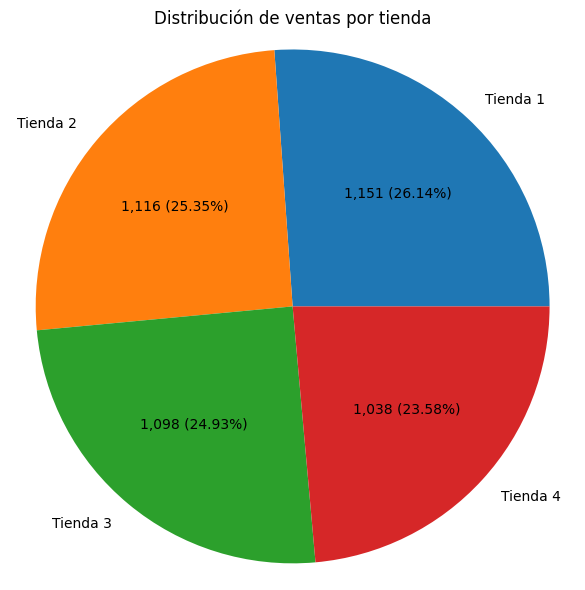

In [15]:
plt.figure(figsize=(6, 6))

# Función para agregar porcentaje y cantidad entre paréntesis
def formato_porcentaje_y_cantidad(pct, allvals):
    absolute = pct / 100.*sum(allvals)  # Calcula la cantidad
    return f'{absolute:,.0f} ({pct:.2f}%)'  # Formato con porcentaje y cantidad

plt.pie(ventas_por_tienda["Ventas Millones"],
        labels=ventas_por_tienda["Nombre tienda"],
        autopct=lambda pct: formato_porcentaje_y_cantidad(pct, ventas_por_tienda["Ventas Millones"]),
        startangle=0)

# Título
plt.title("Distribución de ventas por tienda")
plt.axis('equal')  # Hace el gráfico circular (no ovalado)
plt.tight_layout()
plt.show()

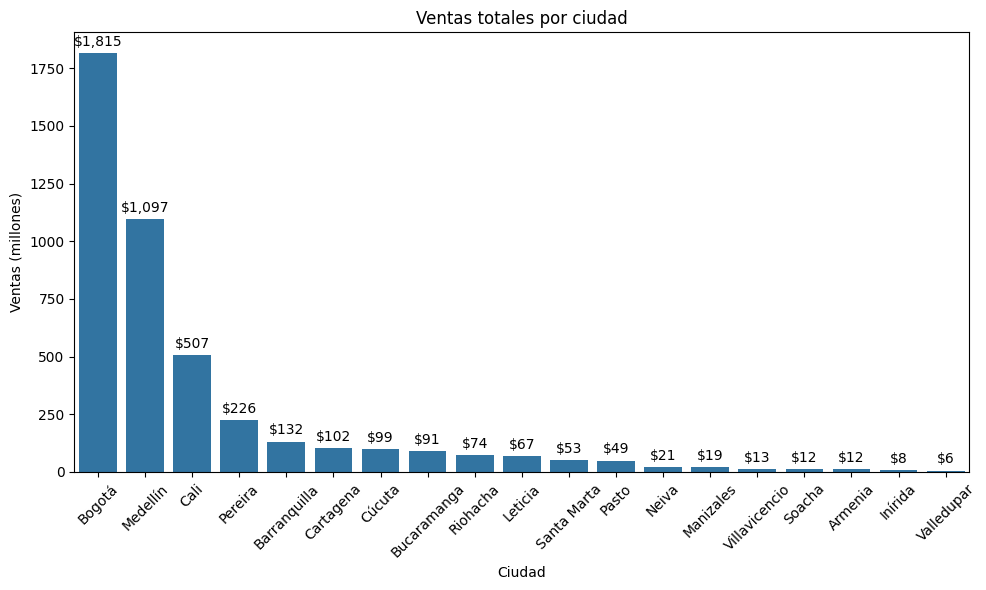

In [16]:
# Agrupar ventas por ciudad
ventas_por_ciudad = df_tiendas.groupby("Lugar de Compra")["Precio"].sum().reset_index()
ventas_por_ciudad = ventas_por_ciudad.rename(columns={"Precio": "Ventas", "Lugar de Compra": "Ciudad"})
ventas_por_ciudad["Ventas Millones"] = ventas_por_ciudad["Ventas"] / 1_000_000
# Ordenar (opcional, por claridad en la gráfica)
ventas_por_ciudad = ventas_por_ciudad.sort_values("Ventas Millones", ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10,6))
ax = sns.barplot(data=ventas_por_ciudad, x="Ciudad", y="Ventas Millones")

# Etiquetas con los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt="${:,.0f}")

plt.title("Ventas totales por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

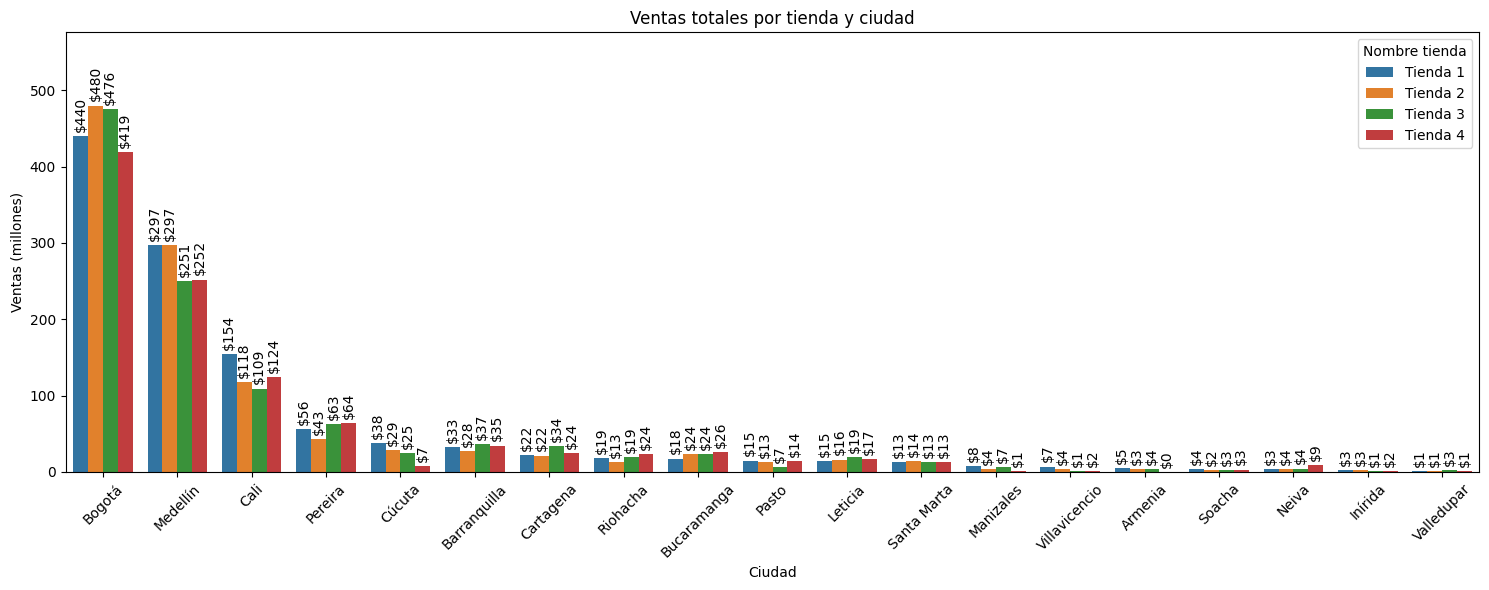

In [17]:
# Agrupar ventas por tienda y ciudad
ventas_tienda_ciudad = df_tiendas.groupby(["Nombre tienda", "Lugar de Compra"])["Precio"].sum().reset_index()
ventas_tienda_ciudad = ventas_tienda_ciudad.rename(columns={"Precio": "Ventas", "Lugar de Compra": "Ciudad"})
ventas_tienda_ciudad["Ventas Millones"] = ventas_tienda_ciudad["Ventas"] / 1_000_000
# Ordenar (opcional, por claridad en la gráfica)
ventas_tienda_ciudad = ventas_tienda_ciudad.sort_values(["Nombre tienda", "Ventas Millones"], ascending=[True, False])

# Crear gráfico de barras
plt.figure(figsize=(15,6))
ax = sns.barplot(data=ventas_tienda_ciudad, x="Ciudad", y="Ventas Millones", hue="Nombre tienda")

# Etiquetas con los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt="${:,.0f}", rotation=90)

plt.title("Ventas totales por tienda y ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Ventas (millones)")
plt.ylim(0, ventas_tienda_ciudad["Ventas Millones"].max() * 1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

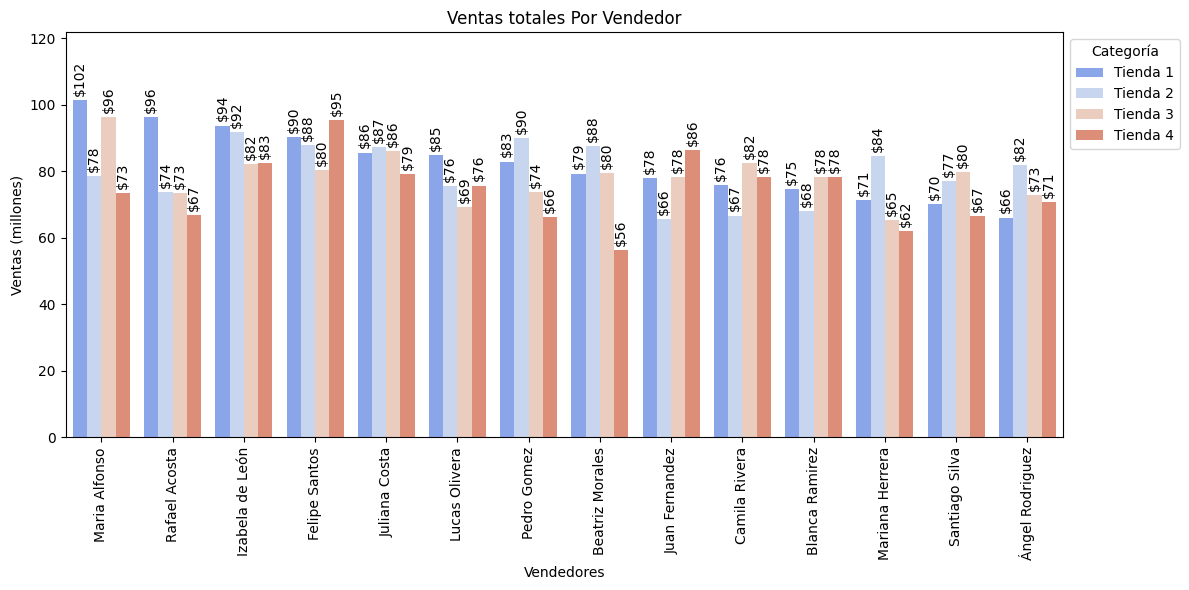

In [18]:
# Agrupar ventas por tienda y empleado
ventas_tienda_empleado = df_tiendas.groupby(["Vendedor", "Nombre tienda"])["Precio"].sum().reset_index()
ventas_tienda_empleado = ventas_tienda_empleado.rename(columns={"Precio": "Ventas"})
ventas_tienda_empleado["Ventas Millones"] = ventas_tienda_empleado["Ventas"] / 1_000_000
ventas_tienda_empleado = ventas_tienda_empleado.sort_values(["Nombre tienda", "Ventas"], ascending=[True, False])

# Crear gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ventas_tienda_empleado, x="Vendedor", y="Ventas Millones", hue="Nombre tienda", palette="coolwarm")

# Etiquetas con los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt="${:,.0f}", rotation=90)

plt.title("Ventas totales Por Vendedor")
plt.xlabel("Vendedores")
plt.ylabel("Ventas (millones)")
# Aumenta el límite del eje Y para que no quede amontonado
plt.ylim(0, ventas_tienda_empleado["Ventas Millones"].max() * 1.2)
# Mueve la leyenda fuera del gráfico, para ver la gráfica
plt.legend(title="Categoría", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Todos los vendedores generan ventas para todas las tienda, por lo que se puede decir que las ventas de uno de ellos se pueden trasladar a otra tienda en caso de cierre de uno de los puntos.

## Ventas por Categoría

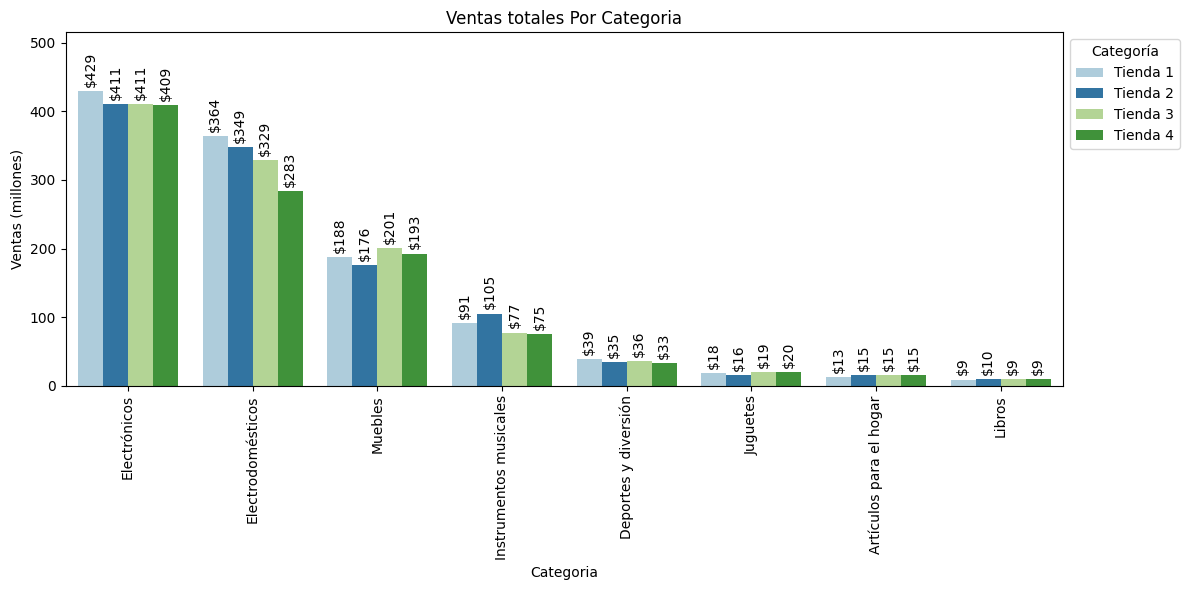

In [19]:
# Agrupar ventas por tienda y categoría
ventas_tienda_categoria = df_tiendas.groupby(["Nombre tienda", "Categoría del Producto"])["Precio"].sum().reset_index()
ventas_tienda_categoria = ventas_tienda_categoria.rename(columns={"Precio": "Ventas"})
ventas_tienda_categoria["Ventas Millones"] = ventas_tienda_categoria["Ventas"] / 1_000_000
ventas_tienda_categoria = ventas_tienda_categoria.sort_values(["Nombre tienda", "Ventas Millones"], ascending=[True, False])

# Grafico de Ventas por Categoría y Tienda
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ventas_tienda_categoria, x="Categoría del Producto", y="Ventas Millones", hue="Nombre tienda", palette="Paired")

# Etiquetas en la primera gráfica
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt="${:,.0f}", rotation=90)

plt.title("Ventas totales Por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Ventas (millones)")
# Aumenta el límite del eje Y para que no quede amontonado
plt.ylim(0, ventas_tienda_categoria["Ventas Millones"].max() * 1.2)
# Mueve la leyenda fuera del gráfico, para ver la gráfica
plt.legend(title="Categoría", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

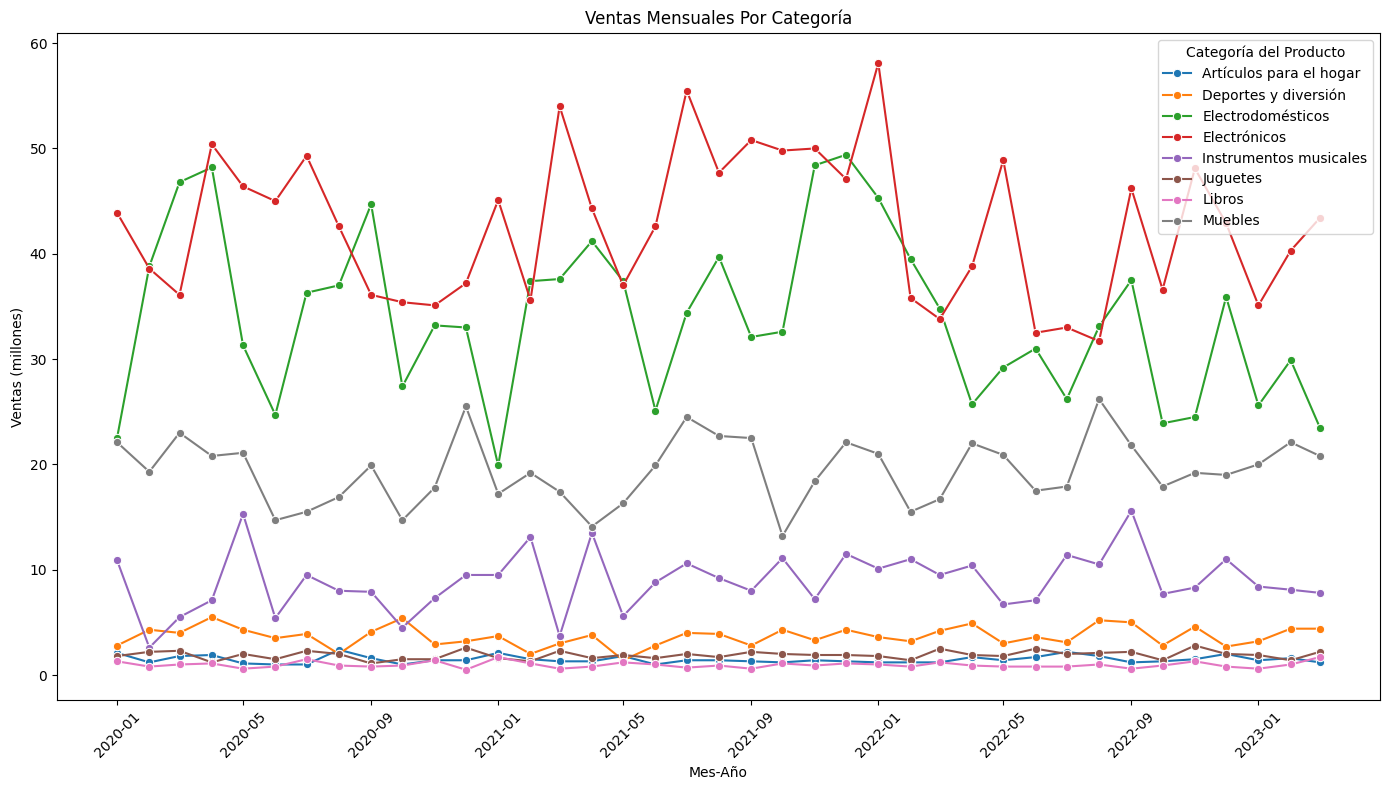

In [20]:
df_tiendas["Fecha de Compra"] = pd.to_datetime(df_tiendas["Fecha de Compra"])
df_tiendas["Mes-Año"] = df_tiendas["Fecha de Compra"].dt.to_period("M").astype(str)

# Agrupar por Mes-Año y Categoría, sumar ventas
ventas_mes_categoria = df_tiendas.groupby(["Mes-Año", "Categoría del Producto"])["Precio"].sum().reset_index()
ventas_mes_categoria = ventas_mes_categoria.rename(columns={"Precio": "Ventas"})
ventas_mes_categoria["Ventas Millones"] = round(ventas_mes_categoria["Ventas"] / 1_000_000, 1)

# Convertir 'Mes-Año' a datetime para graficar en orden
ventas_mes_categoria["Mes-Año"] = pd.to_datetime(ventas_mes_categoria["Mes-Año"])
ventas_mes_categoria = ventas_mes_categoria.sort_values("Mes-Año")

# Crear gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=ventas_mes_categoria, x="Mes-Año", y="Ventas Millones", hue="Categoría del Producto", marker="o")

plt.title("Ventas Mensuales Por Categoría")
plt.xlabel("Mes-Año")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Calificación promedio de la tienda


  Nombre tienda  Calificación
0      Tienda 1      3.976685
1      Tienda 2      4.037304
2      Tienda 3      4.048326
3      Tienda 4      3.995759 



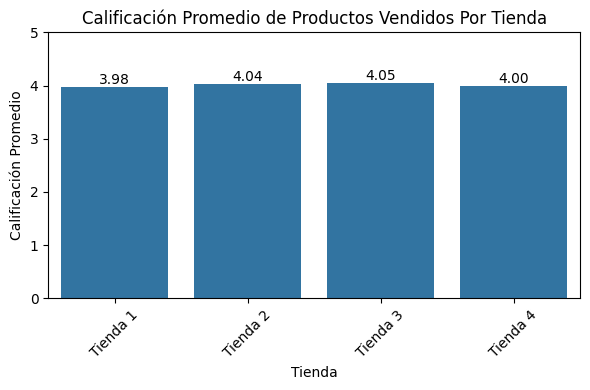

In [21]:
# Agrupación por nombre de tienda, calculo de promedios de calificación
calificacion_promedio_tienda = df_tiendas.groupby("Nombre tienda")["Calificación"].mean().reset_index()
print(calificacion_promedio_tienda, "\n")
plt.figure(figsize=(6,4))

ax = sns.barplot(data=calificacion_promedio_tienda, x="Nombre tienda", y="Calificación")
plt.title("Calificación Promedio de Productos Vendidos Por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
for container in ax.containers:
  ax.bar_label(container, fmt="{:.2f}")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [22]:
df_tiendas.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Nombre tienda',
       'Mes-Año'],
      dtype='object')

Producto mejor calificado en la Tienda 1: Ajedrez de madera - puntaje 4.43
Producto mejor calificado en la Tienda 2: Bicicleta - puntaje 4.53
Producto mejor calificado en la Tienda 3: Juego de mesa - puntaje 4.54
Producto mejor calificado en la Tienda 4: Batería - puntaje 4.33



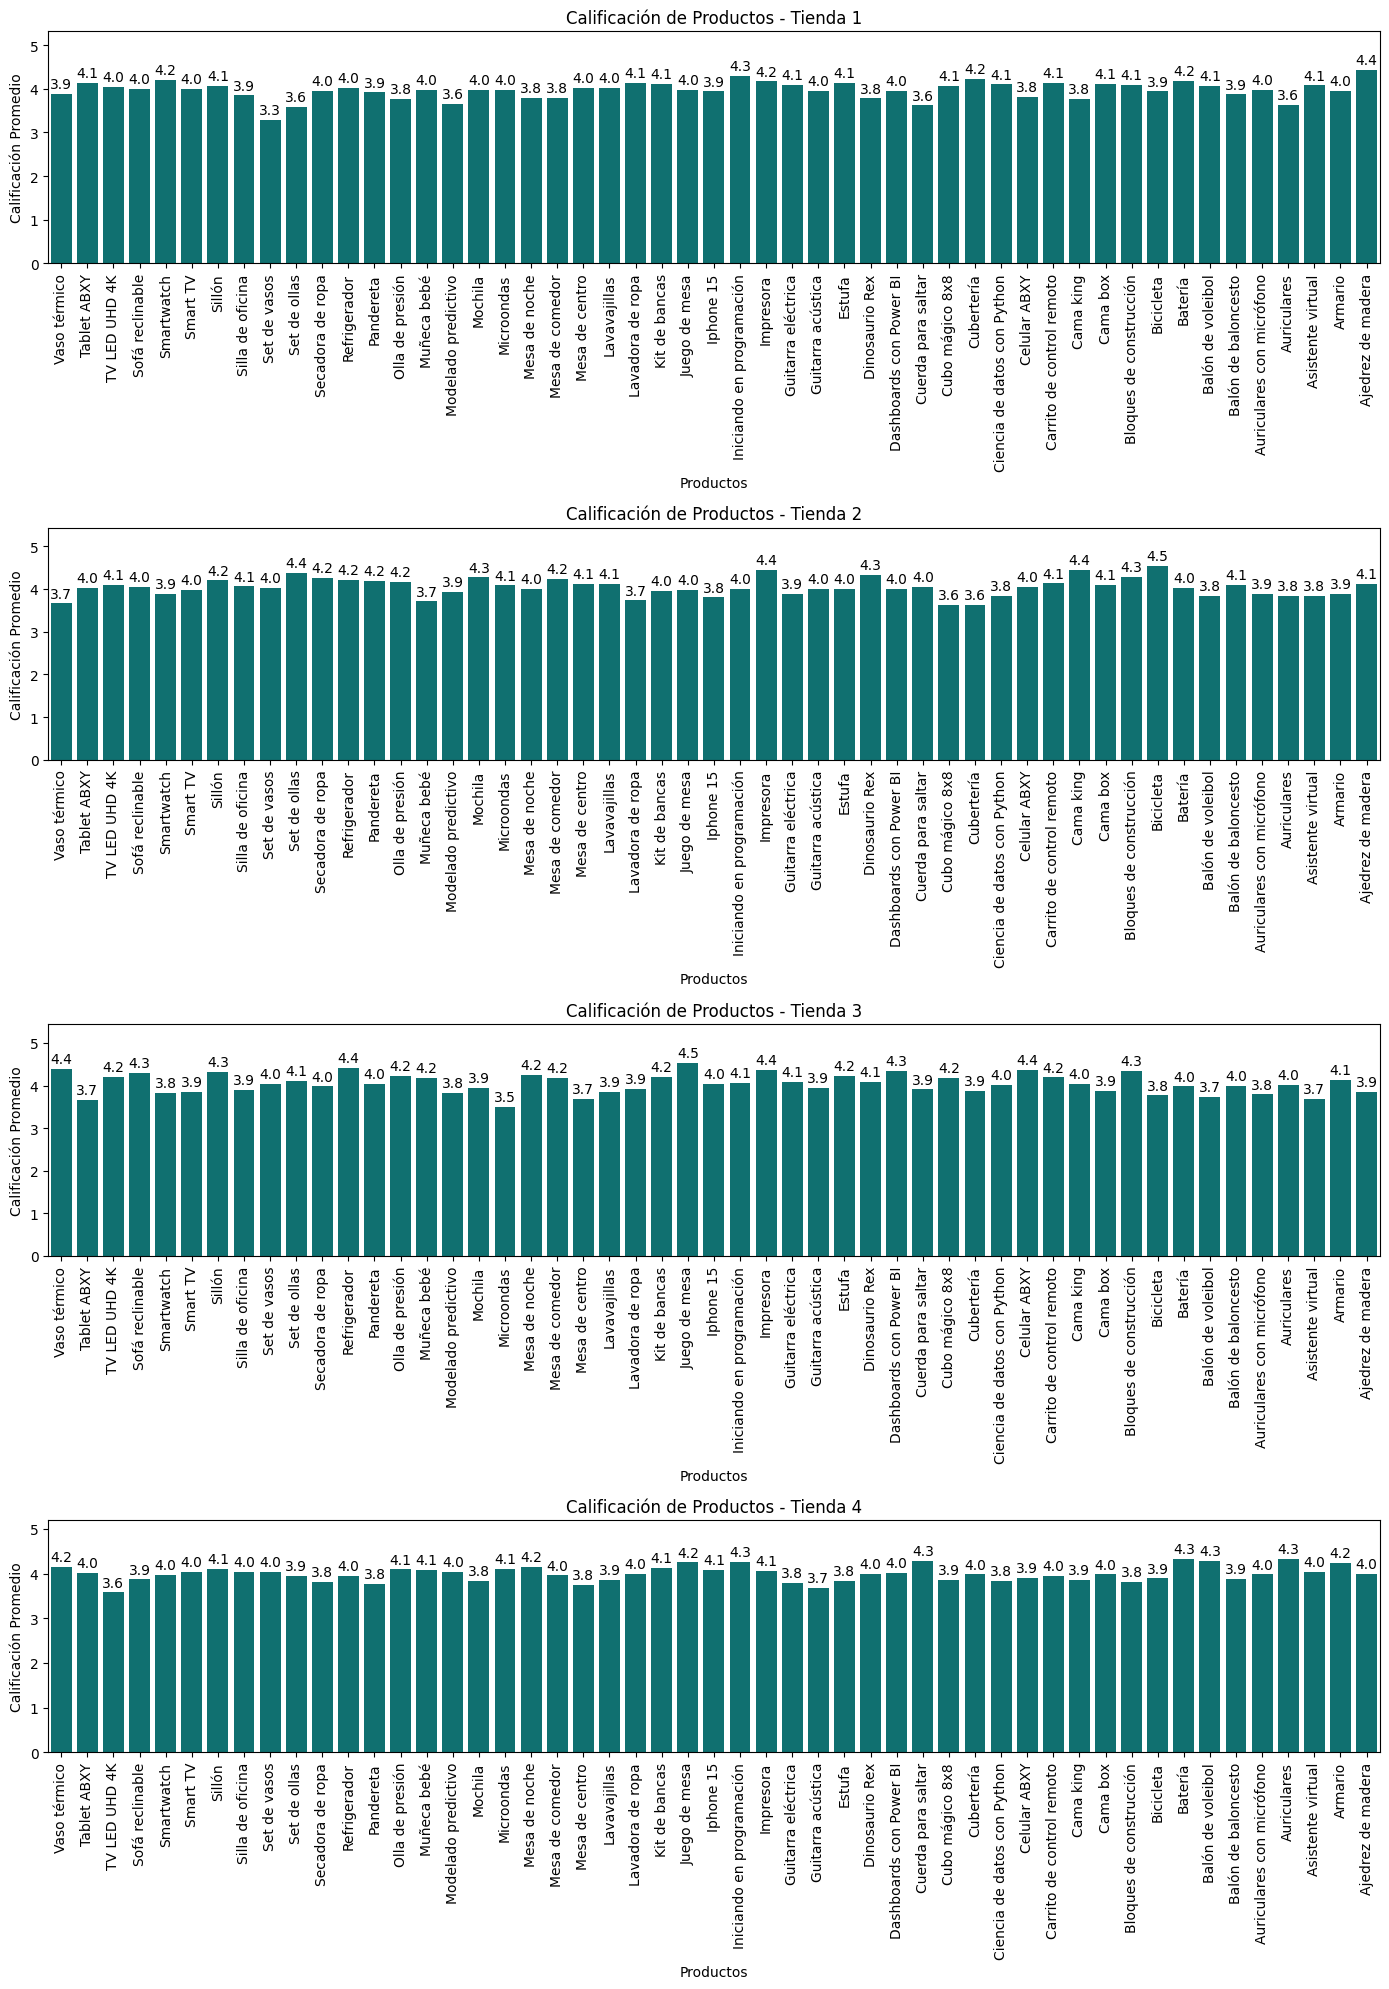

In [23]:
calificacion_prom_tienda_prod = df_tiendas.groupby(["Nombre tienda", "Producto"])["Calificación"].mean().reset_index()
calificacion_prom_tienda_prod["Calificación"] = round(calificacion_prom_tienda_prod["Calificación"], 2)
fig, ax = plt.subplots(4, 1, figsize=(14,20))
ax = ax.flatten()
for i in range(4):
  df_temp = calificacion_prom_tienda_prod[calificacion_prom_tienda_prod["Nombre tienda"] == f"Tienda {i+1}"]
  df_temp = df_temp.sort_values("Producto", ascending=False)
  sns.barplot(data=df_temp, ax=ax[i], x="Producto", y="Calificación", color="teal")
  for container in ax[i].containers:
    ax[i].bar_label(container, fmt='%.1f', label_type='edge', padding=2)
  ax[i].set_title(f"Calificación de Productos - Tienda {i+1}")
  ax[i].set_xlabel("Productos")
  ax[i].tick_params(axis='x', labelrotation=90)
  ax[i].set_ylim(0, df_temp["Calificación"].max() * 1.2)
  ax[i].set_ylabel("Calificación Promedio")

  mejor_producto = df_temp.loc[df_temp["Calificación"].idxmax(), "Producto"]
  mejor_calificacion = df_temp["Calificación"].max()
  print(f"Producto mejor calificado en la Tienda {i+1}: {mejor_producto} - puntaje {mejor_calificacion}")

print()
plt.tight_layout()
plt.show()


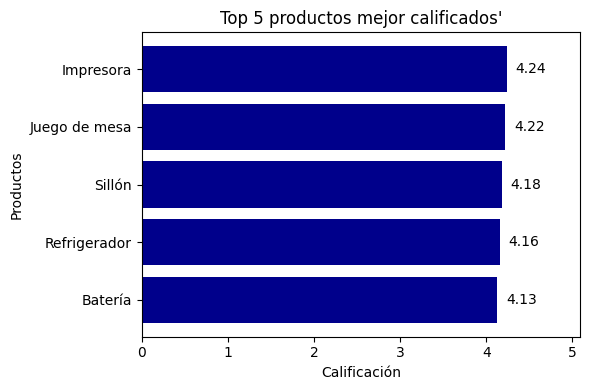

In [63]:
top5_califi_productos = df_tiendas.groupby(["Producto"])["Calificación"].mean().reset_index()
top5_califi_productos["Calificación"] = top5_califi_productos["Calificación"].round(2)
top5_califi_productos = top5_califi_productos.sort_values("Calificación", ascending=False).reset_index(drop=True)
top5_califi_productos = top5_califi_productos.head(5)
plt.figure(figsize=(6, 4))
plt.barh(top5_califi_productos["Producto"], top5_califi_productos["Calificación"], color="darkblue")
plt.xlabel("Calificación")
plt.ylabel("Productos")
plt.xlim(0, top5_califi_productos["Calificación"].max()*1.2)
plt.title("Top 5 productos mejor calificados'")
plt.gca().invert_yaxis()
for i, valor in enumerate(top5_califi_productos["Calificación"]):
    plt.text(valor + 0.1, i, str(valor), va="center")
plt.tight_layout()
plt.show()

Los 5 productos mejor calificados son: las impresoras, juegos de mesa, sillones, refrigeradores y baterías. Estos pertenecen a las siguientes categorias:

In [70]:
for producto in top5_califi_productos["Producto"]:
  categoria = df_tiendas.loc[df_tiendas["Producto"]==str(producto), "Categoría del Producto"].iloc[0]
  print(f"{producto} en la categoría {categoria}")

Impresora en la categoría Electrónicos
Juego de mesa en la categoría Juguetes
Sillón en la categoría Muebles
Refrigerador en la categoría Electrodomésticos
Batería en la categoría Instrumentos musicales


## Productos más y menos vendidos

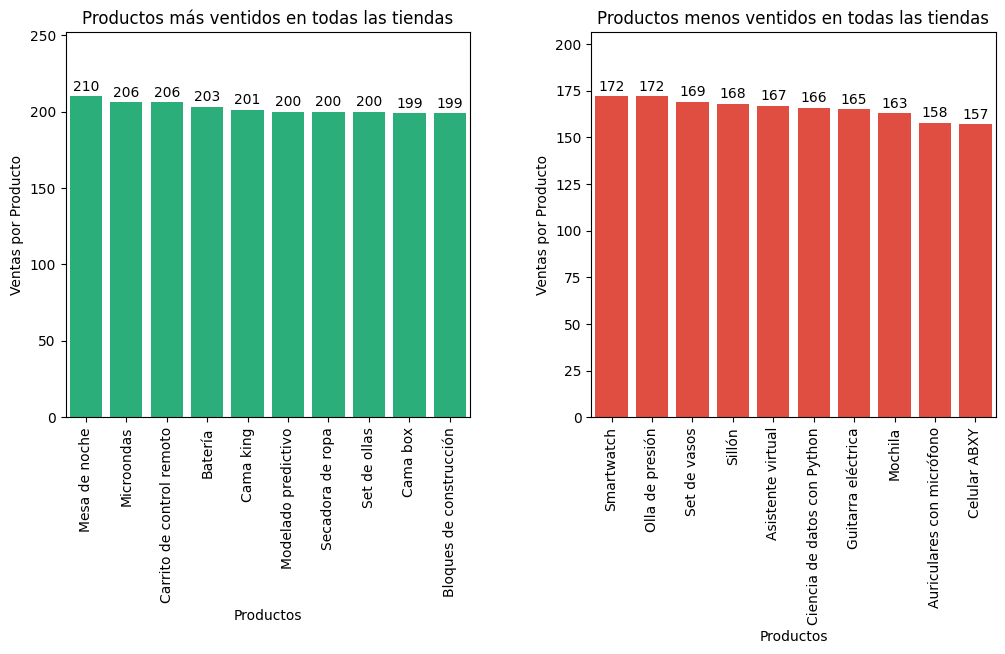

In [88]:
# Agrupar ventas por tienda y producto
ventas_por_producto = df_tiendas.groupby("Producto").size().reset_index(name="Cantidad")
ventas_por_producto = ventas_por_producto.sort_values("Cantidad", ascending=False).reset_index(drop=True)
produc_mas_vendidos = ventas_por_producto.head(10)
produc_menos_vendidos = ventas_por_producto.tail(10)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(data=produc_mas_vendidos, ax=ax[0], x="Producto", y="Cantidad", color="#16C47F")
for container in ax[0].containers:
  ax[0].bar_label(container, label_type='edge', padding=2)
ax[0].set_title(f"Productos más ventidos en todas las tiendas")
ax[0].set_xlabel("Productos")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylim(0, produc_mas_vendidos["Cantidad"].max() * 1.2)
ax[0].set_ylabel("Ventas por Producto")

sns.barplot(data=produc_menos_vendidos, ax=ax[1], x="Producto", y="Cantidad", color="#F93827")
for container in ax[1].containers:
  ax[1].bar_label(container, label_type='edge', padding=2)
ax[1].set_title(f"Productos menos ventidos en todas las tiendas")
ax[1].set_xlabel("Productos")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylim(0, produc_menos_vendidos["Cantidad"].max() * 1.2)
ax[1].set_ylabel("Ventas por Producto")

fig.subplots_adjust(
    wspace=0.3  # espacio horizontal entre subplots
)
plt.show()

## Envío promedio por tienda

Son varias ciudades a las que se hacen envios

In [94]:
df_tiendas["Lugar de Compra"].unique()

array(['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Santa Marta',
       'Pereira', 'Barranquilla', 'Villavicencio', 'Inírida', 'Cúcuta',
       'Manizales', 'Neiva', 'Bucaramanga', 'Valledupar', 'Pasto',
       'Riohacha', 'Armenia', 'Leticia', 'Soacha'], dtype=object)

In [96]:
df_tiendas.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Nombre tienda',
       'Mes-Año'],
      dtype='object')

Promedio de envio más costoso para la tienda 0:     $43420 a Soacha
Promedio de envio más costoso para la tienda 1:     $64900 a Inírida
Promedio de envio más costoso para la tienda 2:     $48914 a Manizales
Promedio de envio más costoso para la tienda 3:     $44750 a Soacha



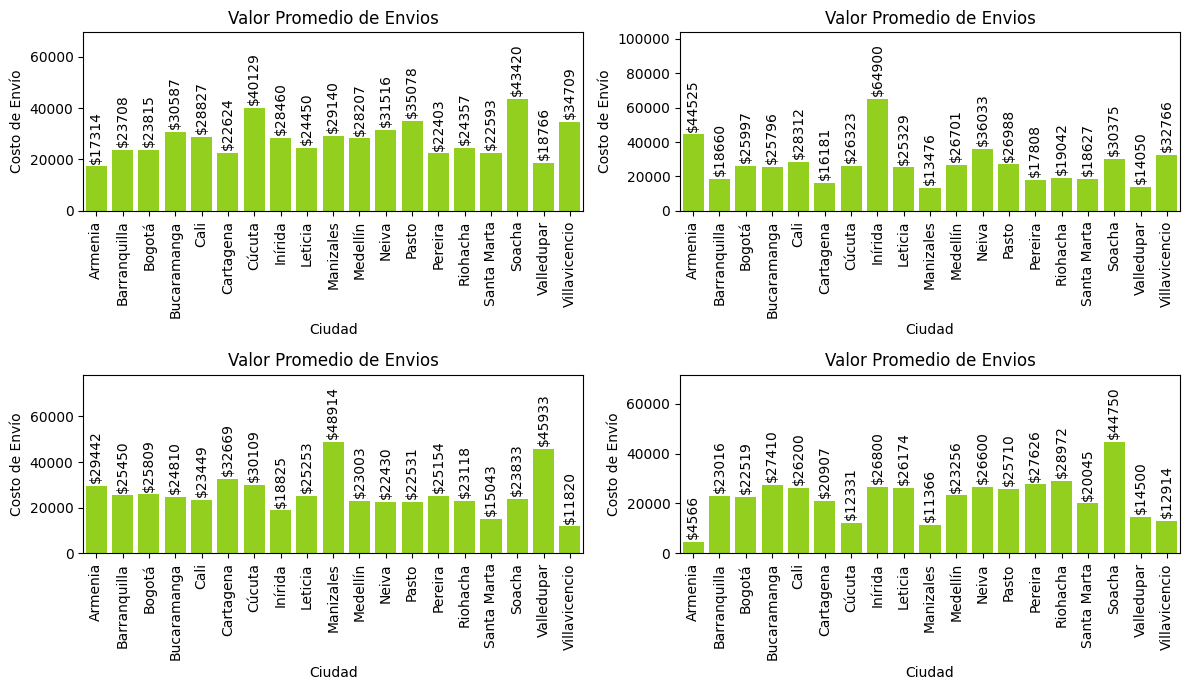

In [138]:
envios = df_tiendas.groupby(["Nombre tienda", "Lugar de Compra"])["Costo de envío"].mean().reset_index()
envios = envios.sort_values(["Nombre tienda", "Lugar de Compra"], ascending=[True, True])
fig, ax = plt.subplots(2, 2, figsize=(12,7))
ax = ax.flatten()
for i, tienda in enumerate(envios["Nombre tienda"].unique()):
  df_temp = envios[envios["Nombre tienda"]==tienda]
  sns.barplot(data=df_temp, ax=ax[i], x="Lugar de Compra", y="Costo de envío", color="#9BEC00")
  for container in ax[i].containers:
    ax[i].bar_label(container, fmt="$%i",label_type="edge", padding=2, rotation=90)
  ax[i].set_title(f"Valor Promedio de Envios")
  ax[i].set_xlabel("Ciudad")
  ax[i].tick_params(axis='x', labelrotation=90)
  ax[i].set_ylim(0, df_temp["Costo de envío"].max() * 1.6)
  ax[i].set_ylabel("Costo de Envío")

  prod_costoso_envio = df_temp.loc[df_temp["Costo de envío"].idxmax(), "Lugar de Compra"]
  mayor_costo_envio = df_temp["Costo de envío"].max()
  mayor_costo_envio = int(mayor_costo_envio)
  print(f"Promedio de envio más costoso para la tienda {i}: \
    ${mayor_costo_envio} a {prod_costoso_envio}")

print()
plt.tight_layout()
plt.show()

Teniendo en cuenta que los vendedores realizan ventas en todas las ciudades, que todas las tiendas realizan envios al mismo conjunto de ciudades y que todas las tiendas manejan los mismos productos, se recomienda cerrar la **Tienda 4**, que aunque tiene una puntuacipon algo mejor que la Tienda 1, es la Tienda 4, la que tiene menor cantidad de ventas.